In [2]:
print("done")

done


done
done
done
done


C:\Users\shire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 495, 32)             │           4,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 247, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 247, 50)             │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 247, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,284 (172.98 KB)

 Trainable params: 44,284 (172.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 94s 244ms/step - accuracy: 0.5345 - loss: 0.6914 - val_accuracy: 0.5460 - val_loss: 0.6890
Epoch 2/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 53s 152ms/step - accuracy: 0.5458 - loss: 0.6891 - val_accuracy: 0.5477 - val_loss: 0.6866
Epoch 3/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 52s 151ms/step - accuracy: 0.5454 - loss: 0.6888 - val_accuracy: 0.5460 - val_loss: 0.6805
Epoch 4/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 53s 153ms/step - accuracy: 0.5543 - loss: 0.6839 - val_accuracy: 0.5677 - val_loss: 0.6811
Epoch 5/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 53s 153ms/step - accuracy: 0.5454 - loss: 0.6898 - val_accuracy: 0.5456 - val_loss: 0.6856
Epoch 6/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 55s 159ms/step - accuracy: 0.5552 - loss: 0.6857 - val_accuracy: 0.5506 - val_loss: 0.6867
Epoch 7/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.5573 - loss: 0.6853 - val_accuracy: 0.5458 - val_loss: 0.6889
Epoch 8/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.5462 -

149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6829 - loss: 0.8265
Test Loss: 0.8718113899230957
Test Accuracy: 0.6645622849464417
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      2185
           1       0.68      0.73      0.70      2567

    accuracy                           0.66      4752
   macro avg       0.66      0.66      0.66      4752
weighted avg       0.66      0.66      0.66      4752

Confusion Matrix
[[1295  890]
 [ 704 1863]]


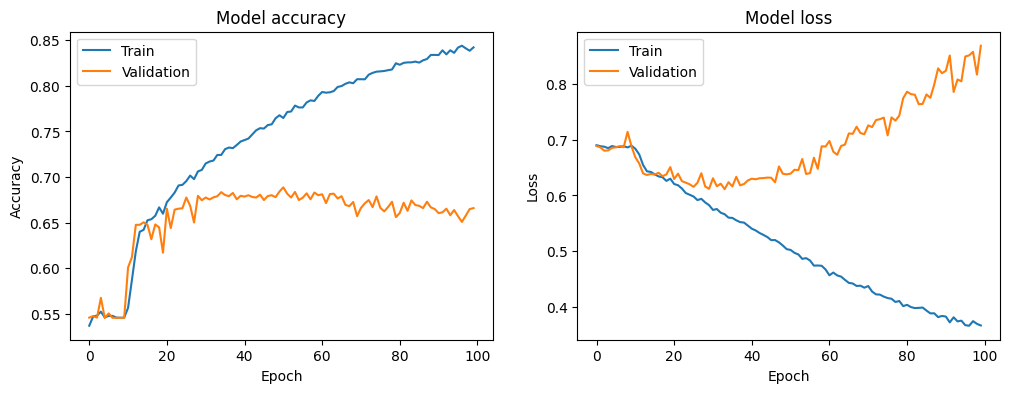

In [3]:
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print("done")
# Function to read dataset and convert to 4-mers
def read_and_preprocess(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    ids, sequences, labels = [], [], []
    for i in range(0, len(lines), 3):
        ids.append(lines[i].strip())
        sequences.append(lines[i+1].strip())
        labels.append(int(lines[i+2].strip()))
    
    # Convert sequences to 4-mers
    four_mers = [[seq[j:j+4] for j in range(len(seq) - 3)] for seq in sequences]
    
    return ids, four_mers, labels

# Function to create Word2Vec model
def create_word2vec_model(four_mers, vector_size=50, window=5, min_count=1, workers=4):
    model = Word2Vec(four_mers, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model
print("done")
# Function to convert 4-mers to their Word2Vec vectors
def convert_to_vectors(four_mers, model):
    vectors = [[model.wv[mer] for mer in seq if mer in model.wv] for seq in four_mers]
    return vectors

# Function to pad sequences
def pad_sequences_fixed_length(sequences, maxlen):
    return pad_sequences(sequences, maxlen=maxlen, dtype='float32', padding='post', truncating='post', value=0.0)

# Function to encode labels
def encode_labels(labels):
    return to_categorical(labels)

# Read and preprocess the data
file_path = r'C:\\Users\shire\OneDrive\Desktop\Project\dataset.txt'  # Replace with the actual path to your dataset file
ids, four_mers, labels = read_and_preprocess(file_path)
print("done")
# Create Word2Vec model
word2vec_model = create_word2vec_model(four_mers)

# Convert sequences to vectors
sequence_vectors = convert_to_vectors(four_mers, word2vec_model)

# Pad sequences to fixed length
max_sequence_length = max(len(seq) for seq in sequence_vectors)
padded_sequences = pad_sequences_fixed_length(sequence_vectors, max_sequence_length)

# Encode labels
encoded_labels = encode_labels(labels)
print("done")
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Function to build the CNN-LSTM model
def build_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()
    
    # Convolutional layer
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    
    # LSTM layer
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(50))
    
    # Fully connected layer
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Define input shape and number of classes
input_shape = (padded_sequences.shape[1], padded_sequences.shape[2])
num_classes = encoded_labels.shape[1]

# Build the model
model = build_cnn_lstm_model(input_shape, num_classes)

# Print the model summary
model.summary()

# Define training parameters
batch_size = 64
epochs = 100

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# Save the model
model.save(r'C:\Users\shire\OneDrive\Desktop\Project\cnn_lstm_model_optimized_4mer.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print('Classification Report')
print(classification_report(y_true_classes, y_pred_classes))

print('Confusion Matrix')
print(confusion_matrix(y_true_classes, y_pred_classes))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)365

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [3]:
import matplotlib.pyplot as plt

plt.savefig(r'C:\Users\shire\OneDrive\Desktop\Project\cnn+lstm')

<Figure size 640x480 with 0 Axes>